# Poker Winning Probabilities
Its is often hard to estimate the winning probabilities when playing poker.
In televised tournaments one would see the winning probabilites at the side. However keep in mind that these probabilities are from the perspective of the viewer where all players hands are visible to the us. In reality the players only know the hands they have.

In [1]:
!pip install git+https://github.com/garyongguanjie/deuces.git

  Cloning https://github.com/garyongguanjie/deuces.git to /tmp/pip-req-build-3wf3wxuj
  Running command git clone -q https://github.com/garyongguanjie/deuces.git /tmp/pip-req-build-3wf3wxuj
  Created wheel for deuces: filename=deuces-0.1-cp36-none-any.whl size=12274 sha256=e86de2c764626f696a34bc33be05024b3f03451a7203a7a1346a2ae88c6711bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ot3tcjf/wheels/55/4b/e7/98039f412098a415373f7556929dde0b288232a506bbdce6a1
Successfully built deuces


In [232]:
from deuces import Card,Evaluator,Deck
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
def monte_carlo_evaluator(hand,board,num_opp=4,iterations=1000):
    evaluator = Evaluator()
    avg_win = 0
    for i in range(iterations):
        deck = Deck()
        players_cards = []
        # Remove cards from deck in current hand
        for c in hand:
            deck.cards.remove(c)
        # Remove cards from deck in current board
        for b in board:
            deck.cards.remove(b)
        
        # Sample opponent cards
        for player in range(num_opp):
            players_cards.append(deck.draw(2))
        
        # Simulate the remaining hands
        draw =  deck.draw(5-len(board))
        if len(board) == 4:
            draw = [draw]
        
        win = True
        hand_score = evaluator.evaluate(hand,board+draw)
        for h in players_cards:
            opp_score = evaluator.evaluate(h,board+draw)
            if opp_score<hand_score:
                win = False
                break
        if win:
            avg_win+=1
    return avg_win/iterations

# Investigating Pre-Flop 5 players

In [222]:
RANKS = ["2","3","4","5","6","7","8","9","T","J","Q","K","A"]
SUITS = ["d","c","h","s"]

In [223]:
df = pd.DataFrame(index=RANKS,columns=RANKS)

In [224]:
def unsuited(df):
    evaluator = Evaluator()
    for r1 in RANKS:
        for r2 in RANKS:
            hand = [Card.new(r1+SUITS[0]),Card.new(r2+SUITS[1])]
            wr = monte_carlo_evaluator(hand,[])
            df.loc[r1,r2] = wr

In [225]:
unsuited(df)

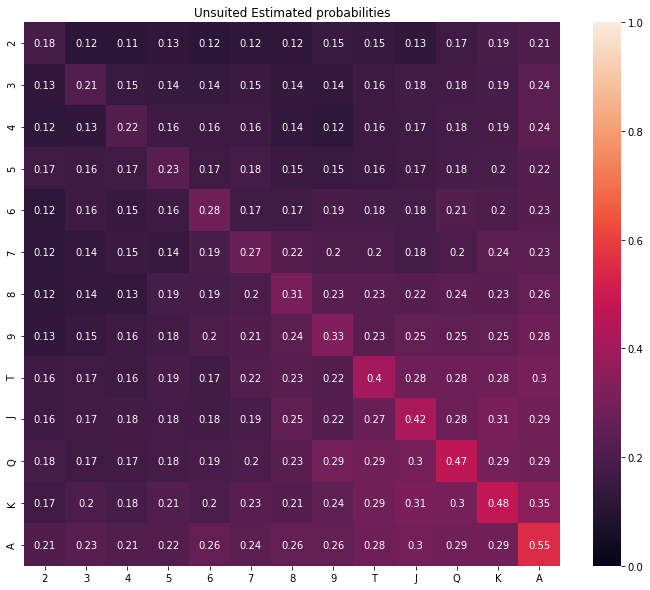

In [241]:
fig, ax = plt.subplots(figsize=(12,10))
ax.title.set_text("Unsuited Estimated probabilities")
sns.heatmap(df.astype(float), annot=True,vmin=0,vmax=1)

In [239]:
def suited(df):
    evaluator = Evaluator()
    for r1 in RANKS:
        for r2 in RANKS:
            if r1 == r2:
                df.loc[r1,r2] = 0
                continue
            hand = [Card.new(r1+SUITS[0]),Card.new(r2+SUITS[0])]
            wr = monte_carlo_evaluator(hand,[])
            df.loc[r1,r2] = wr

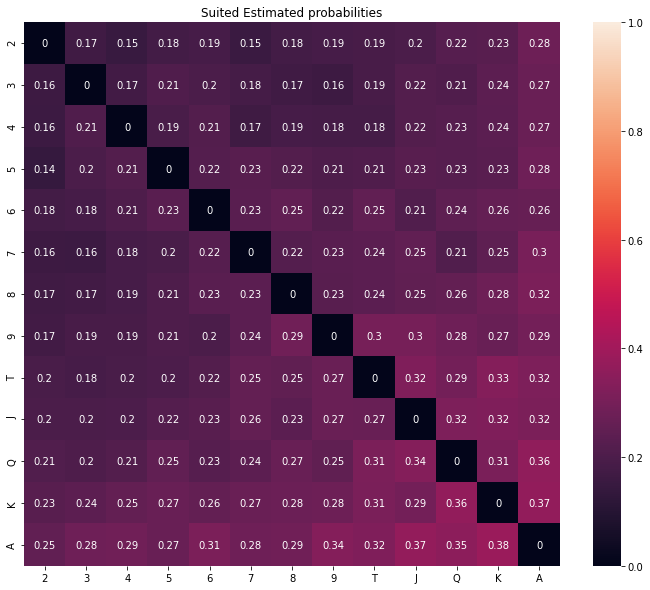

In [243]:
df_s = pd.DataFrame(index=RANKS,columns=RANKS)
suited(df_s)
fig, ax = plt.subplots(figsize=(12,10))
ax.title.set_text("Suited Estimated probabilities")
sns.heatmap(df_s.astype(float), annot=True,vmin=0,vmax=1)

# Investigating Post Flop
Post Flop is harder to investigate as there are so many possibilites and it is impossible to put all of them in a table. For the purpose of this let us investigate the winning probabilities if you have 7,8 unsuited.

In [244]:
hand = [Card.new("7h"),Card.new("8s")]

## Post flop single Pair

In [248]:
board = [Card.new("8c"),Card.new("5h"),Card.new("Jc")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 8 ♣ ] , [ 5 ❤ ] , [ J ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.279


In [249]:
board = [Card.new("8c"),Card.new("5h"),Card.new("2c")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 8 ♣ ] , [ 5 ❤ ] , [ 2 ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.269


In [250]:
board = [Card.new("8c"),Card.new("5h"),Card.new("Ac")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 8 ♣ ] , [ 5 ❤ ] , [ A ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.258


# Post Flop two pair

In [251]:
board = [Card.new("8c"),Card.new("7d"),Card.new("Ac")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 8 ♣ ] , [ 7 ♦ ] , [ A ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.536


In [252]:
board = [Card.new("8c"),Card.new("7d"),Card.new("2c")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 8 ♣ ] , [ 7 ♦ ] , [ 2 ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.567


# Post flop almost a straight

In [253]:
board = [Card.new("5c"),Card.new("9d"),Card.new("2c")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 5 ♣ ] , [ 9 ♦ ] , [ 2 ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.186


In [254]:
board = [Card.new("6c"),Card.new("9d"),Card.new("2c")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 6 ♣ ] , [ 9 ♦ ] , [ 2 ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.306


In [255]:
board = [Card.new("6c"),Card.new("9d"),Card.new("Ac")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 6 ♣ ] , [ 9 ♦ ] , [ A ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.297


# Post flop Straight

In [256]:
board = [Card.new("6c"),Card.new("9d"),Card.new("Tc")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 6 ♣ ] , [ 9 ♦ ] , [ T ♣ ]  
Hand
  [ 7 ❤ ] , [ 8 ♠ ]  
Win Probability 0.775


# Post flop Almost a Flush

In [261]:
hand = [Card.new("7h"),Card.new("8h")]
board = [Card.new("2h"),Card.new("Qh"),Card.new("Ad")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 2 ❤ ] , [ Q ❤ ] , [ A ♦ ]  
Hand
  [ 7 ❤ ] , [ 8 ❤ ]  
Win Probability 0.325


In [262]:
hand = [Card.new("7d"),Card.new("8h")]
board = [Card.new("2h"),Card.new("Qh"),Card.new("Ah")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 2 ❤ ] , [ Q ❤ ] , [ A ❤ ]  
Hand
  [ 7 ♦ ] , [ 8 ❤ ]  
Win Probability 0.188


# Post flop almost straight flush

In [263]:
hand = [Card.new("7h"),Card.new("8h")]
board = [Card.new("6h"),Card.new("9h"),Card.new("As")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 6 ❤ ] , [ 9 ❤ ] , [ A ♠ ]  
Hand
  [ 7 ❤ ] , [ 8 ❤ ]  
Win Probability 0.499


# Post flop flush

In [264]:
hand = [Card.new("7h"),Card.new("8h")]
board = [Card.new("2h"),Card.new("3h"),Card.new("Qh")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 2 ❤ ] , [ 3 ❤ ] , [ Q ❤ ]  
Hand
  [ 7 ❤ ] , [ 8 ❤ ]  
Win Probability 0.679


# Post flop Straight Flush

In [266]:
hand = [Card.new("7h"),Card.new("8h")]
board = [Card.new("6h"),Card.new("9h"),Card.new("Th")]
print("Board")
Card.print_pretty_cards(board)
print("Hand")
Card.print_pretty_cards(hand)
print("Win Probability",monte_carlo_evaluator(hand,board))

Board
  [ 6 ❤ ] , [ 9 ❤ ] , [ T ❤ ]  
Hand
  [ 7 ❤ ] , [ 8 ❤ ]  
Win Probability 1.0
